In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil

In [53]:
# Import data

fr_raw = pd.read_csv(r'..\data\search\peak_finder\Final_Results.csv').dropna(axis=1, how='all')
fr_filt = pd.read_csv(r'..\data\processed\filtered_raw_data.csv', index_col=0)
fr_norm = pd.read_csv(r'..\data\processed\run_1_median_linregress_normalized_data.csv', index_col=0)
file_grouping = pd.read_csv(r'..\data\metadata\file_groupings.csv')

fr_quant_filenames_in_analytical_order = file_grouping[file_grouping['quant_file'] == True]['fr_name'].to_list()

animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]

diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

In [24]:
fr_norm.head(1)

,Unique Identifier,Retention Time (min),Quant Ion,Polarity,Area (max),Identification,Lipid Class,Features Found,20210729_AJ_Toh_RatBloodGlucose_T1060M_20210322_8wk_FBG.raw (F3),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),...,20210729_AJ_Toh_RatBloodGlucose_T1101M_20210402_9wk_FBG.raw (F55),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210406_9wk_RBG.raw (F56),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210410_10wk_FBG.raw (F57),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210413_10wk_RBG.raw (F58),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210327_8wk_FBG.raw (F59),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210330_8wk_RBG.raw (F60),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210402_9wk_FBG.raw (F61),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210406_9wk_RBG.raw (F62),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210410_10wk_FBG.raw (F63),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210413_10wk_RBG.raw (F64)
0,unknown_679.05463_0.536,0.536,679.05463,+,24084205.57,unknown,unknown,49,9.961276e+06,1.691781e+07,...,1.156171e+07,9.016913e+06,5.355228e+06,1.613667e+07,1.206792e+07,1.076659e+07,1.182398e+07,9.694285e+06,9.361182e+06,1.109741e+07


In [27]:
file_grouping

,File Name,analytical_run_order,fr_name,rat_label,bg_type,quant_file,week,lipidex_file_number,date,glucose_tolerance
0,20210729_AJ_Toh_RatBloodGlucose_Water_R1,1,20210729_AJ_Toh_RatBloodGlucose_Water_R1.raw (...,NaN,NaN,False,NaN,65,NaN,NaN
1,20210729_AJ_Toh_RatBloodGlucose_Water_R2,2,20210729_AJ_Toh_RatBloodGlucose_Water_R2.raw (...,NaN,NaN,False,NaN,66,NaN,NaN
2,20210729_AJ_Toh_RatBloodGlucose_Water_R3,3,20210729_AJ_Toh_RatBloodGlucose_Water_R3.raw (...,NaN,NaN,False,NaN,67,NaN,NaN
3,20210729_AJ_Toh_RatBloodGlucose_SolventBlank,4,20210729_AJ_Toh_RatBloodGlucose_SolventBlank.r...,NaN,NaN,False,NaN,2,NaN,NaN
4,20210729_AJ_Toh_RatBloodGlucose_ExtractionBlank,5,20210729_AJ_Toh_RatBloodGlucose_ExtractionBlan...,NaN,NaN,False,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
62,20210729_AJ_Toh_RatBloodGlucose_T1062M_2021040...,63,20210729_AJ_Toh_RatBloodGlucose_T1062M_2021040...,1062.0,RBG,True,9.0,14,2021-04-01,impaired
63,20210729_AJ_Toh_RatBloodGlucose_T1101M_2021033...,64,20210729_AJ_Toh_RatBloodGlucose_T1101M_2021033...,1101.0,RBG,True,8.0,54,2021-03-30,diabetic
64,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021033...,65,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021033...,1092.0,RBG,True,8.0,42,2021-03-30,impaired
65,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021041...,66,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021041...,1092.0,RBG,True,10.0,46,2021-04-13,impaired


For each feature: 
1. Get columns corresponding to each animal, regardless of week
2. Within those columns, separate by RBG vs FBG
3. Take RSD of RBG from all 3 weeks 
4. Write that RSD to new DF with column name as "Animal#_RBG/FBG"

In [51]:
fr_norm[fr_quant_filenames_in_analytical_order][cols]

,20210729_AJ_Toh_RatBloodGlucose_T1102M_20210402_9wk_FBG.raw (F61),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210327_8wk_FBG.raw (F59),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210410_10wk_FBG.raw (F63)
0,1.182398e+07,1.206792e+07,9.361182e+06
1,3.171840e+07,3.004373e+07,2.183496e+07
2,1.528755e+07,1.397276e+07,1.339975e+07
3,1.275793e+08,8.073146e+07,1.168454e+08
4,8.584741e+06,5.958120e+06,5.852656e+06
...,...,...,...
1481,2.456722e+05,3.020530e+05,4.061090e+05
1482,6.770359e+05,9.924767e+05,1.194394e+06
1483,3.906703e+05,6.600295e+05,7.709440e+05
1484,1.552571e+05,3.057656e+05,3.311393e+05


In [116]:
rsd_data_by_animal = pd.DataFrame()

for animal in animals_used:
    for bg_type in ['RBG', 'FBG']:
        # subset file_grouping to avoid looking into QC1 and QC3 files
        grouping = file_grouping.drop(file_grouping[file_grouping['fr_name'].isin(fr_nonquant_filenames)].index)
        
        cols = grouping[(grouping['bg_type'] == bg_type) & (grouping['rat_label'] == animal)]['fr_name']
        
        fr_norm_subset = fr_norm[fr_quant_filenames_in_analytical_order]
        rsd_data_by_animal[str(animal) + '_' + bg_type] = \
            fr_norm_subset[cols].std(axis=1) / (fr_norm_subset[cols].mean(axis=1))
        
rsd_data_by_animal

,1091_RBG,1091_FBG,1060_RBG,1060_FBG,1092_RBG,1092_FBG,1062_RBG,1062_FBG,1093_RBG,1093_FBG,1101_RBG,1101_FBG,1102_RBG,1102_FBG,1074_RBG,1074_FBG,1076_RBG,1076_FBG,1082_RBG,1082_FBG
0,0.222652,0.411256,0.424170,0.118236,0.104275,0.342164,0.434835,0.102265,0.456348,0.233246,0.288176,0.409295,0.069727,0.135082,0.132207,0.453755,0.248870,0.799734,0.127956,0.109677
1,0.429315,0.662362,0.428418,0.360134,0.126427,0.125761,0.847836,0.112327,0.423827,0.149696,0.221037,0.223800,0.648786,0.189820,0.227550,0.705987,0.352582,1.052718,0.393197,0.080920
2,0.654049,0.262721,0.577476,0.284134,0.245879,0.326268,0.271214,0.251867,0.208166,0.216775,0.133764,0.200914,0.204017,0.068065,0.359187,0.262542,0.199728,0.776080,0.527450,0.063245
3,0.019071,0.232021,0.490215,0.178983,0.287777,0.463710,0.192200,0.157578,0.413777,0.180631,0.388635,0.177441,0.185410,0.226442,0.084069,0.287536,0.306956,0.732511,0.427381,0.224225
4,0.570087,0.463047,0.576236,0.273049,0.564445,0.311069,0.321922,0.132426,0.366394,0.440719,0.105851,0.257512,0.384827,0.227671,0.135805,0.112507,0.155312,0.770999,0.428606,0.344655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,0.630073,0.803179,0.249185,0.479409,0.261021,0.587450,0.156021,0.504118,0.583442,0.607246,0.566018,0.516952,0.324510,0.255989,0.077109,0.397566,0.478767,0.712987,0.800758,1.130374
1482,0.441444,0.301905,0.237096,0.334083,0.247056,0.493579,0.460994,0.210517,0.376696,0.403373,0.222721,0.477984,0.556882,0.273138,0.431171,0.581360,0.139100,0.684931,0.398690,0.696999
1483,0.514968,0.452213,0.399023,0.318662,0.629283,0.525930,0.342437,0.118001,0.382808,0.449174,0.345819,0.432107,0.447668,0.322062,0.582490,0.864828,0.111545,0.423573,0.272331,0.690609
1484,0.890759,1.060310,0.240417,0.627215,0.131208,0.605692,0.456907,0.661903,0.296881,0.467142,0.772535,0.707078,0.322410,0.360045,0.194593,0.677755,0.291311,0.603952,0.417892,1.152518


### Compare the 

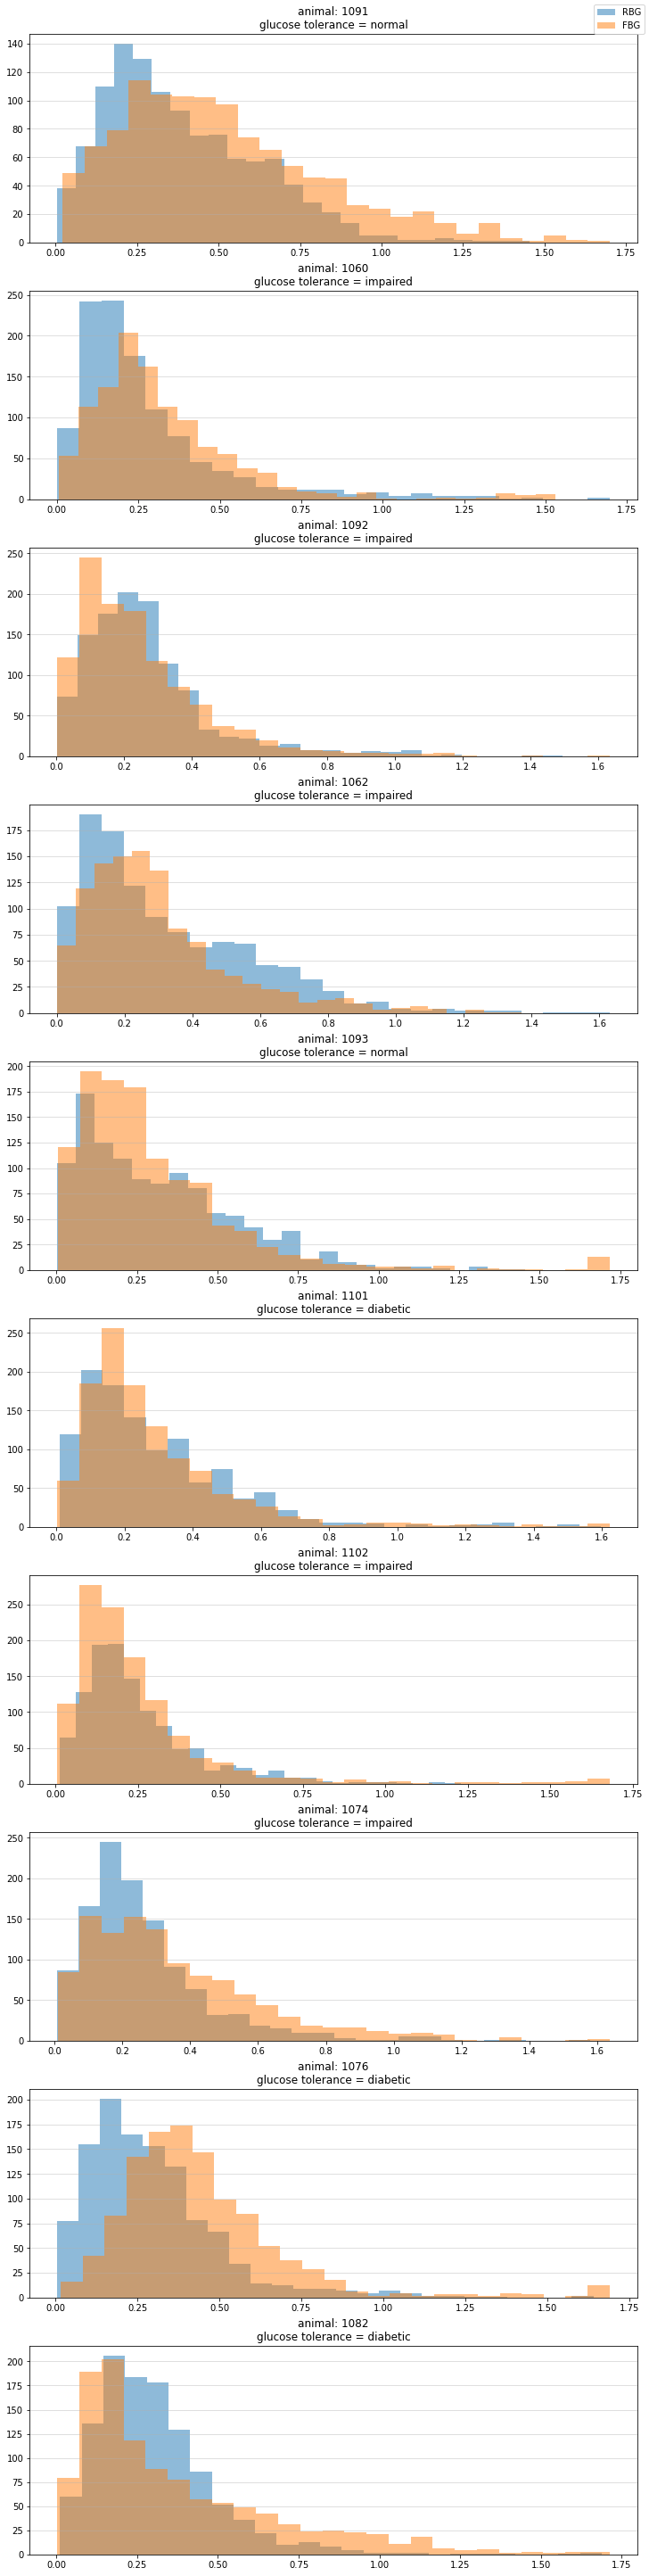

In [117]:
df = rsd_data_by_animal

fig, axs = plt.subplots(nrows=10, ncols=1, constrained_layout=True)
fig.set_size_inches((10, 40))
# plt.tight_layout()

for i, animal in enumerate(animals_used):  # i = row index for axs

        subdf = df.filter(regex=str(animal))
        
        gluc_tol = animal_phenotypes[animal_phenotypes['animal'] == animal]['glucose_tolerance'].values[0]

        ax = axs[i]
        
        ax.hist(subdf.iloc[:, 0], alpha=0.5, label='RBG', bins=25)  # 0th column is RBG
        ax.hist(subdf.iloc[:, 1], alpha=0.5, label='FBG', bins=25)  # 1st column is FBG
        
        ax.grid(alpha=0.5, axis='y')

        ax.set_title(f'animal: {animal}\nglucose tolerance = {gluc_tol}')

handles, labels = plt.gca().get_legend_handles_labels()

fig.legend(handles[:2], labels[:2], )
        
# fig.suptitle('Lipid Class and Glucose Tolerance\nRBG vs FBG\nAverage of all 3 weeks', fontsize=20)

### What if we compare RSDs of all random samples vs all fasted samples?

In [119]:
rsd_data_all = pd.DataFrame()

for bg_type in ['RBG', 'FBG']:
    # subset file_grouping to avoid looking into QC1 and QC3 files
    grouping = file_grouping.drop(file_grouping[file_grouping['fr_name'].isin(fr_nonquant_filenames)].index)

    cols = grouping[(grouping['bg_type'] == bg_type)]['fr_name']

    fr_norm_subset = fr_norm[fr_quant_filenames_in_analytical_order]
    rsd_data_all[bg_type] = \
        fr_norm_subset[cols].std(axis=1) / (fr_norm_subset[cols].mean(axis=1))
        
rsd_data_all

,RBG,FBG
0,0.289434,0.333655
1,0.415117,0.392395
2,0.370802,0.313391
3,0.276045,0.285436
4,0.376937,0.342978
...,...,...
1481,1.195558,0.686966
1482,0.846742,0.590667
1483,0.764400,0.672877
1484,1.043145,0.748321


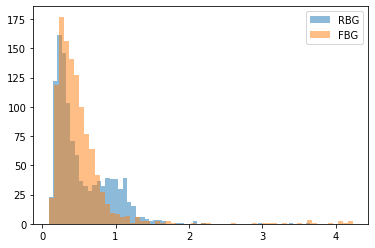

In [140]:
plt.hist(rsd_data_all['RBG'], alpha=0.5, bins=60)
plt.hist(rsd_data_all['FBG'], alpha=0.5, bins=60)
# plt.xlim(0,2)
# plt.ylim(0, 20)
fig = plt.gcf()
# fig.figsize = (20,20)
plt.legend(['RBG', 'FBG'])

### The blue distribution (RBG) of all rat samples has a distinct 2nd hump as if it's bimodal

### if we exclude diabetic rats from this calculation, does the 2nd hump go away? 

In [150]:
rsd_data_by_gluc_tol = pd.DataFrame()

gluc_tolerances = ['normal', 'impaired', 'diabetic']

for gluc_tol in gluc_tolerances:
    for bg_type in ['RBG', 'FBG']:

        # subset file_grouping to avoid looking into QC1 and QC3 files
        grouping = file_grouping.drop(file_grouping[file_grouping['fr_name'].isin(fr_nonquant_filenames)].index)

        cols = grouping[(grouping['glucose_tolerance'] == gluc_tol) & (grouping['bg_type'] == bg_type)]['fr_name']

        fr_norm_subset = fr_norm[fr_quant_filenames_in_analytical_order]
        rsd_data_by_gluc_tol[f'{gluc_tol}_{bg_type}'] = \
            fr_norm_subset[cols].std(axis=1) / (fr_norm_subset[cols].mean(axis=1))
        
rsd_data_by_gluc_tol

,normal_RBG,normal_FBG,impaired_RBG,impaired_FBG,diabetic_RBG,diabetic_FBG
0,0.319508,0.349436,0.309231,0.232264,0.222281,0.446985
1,0.408032,0.447442,0.477949,0.346735,0.293812,0.473649
2,0.417098,0.280873,0.375754,0.249416,0.367311,0.394498
3,0.259046,0.204729,0.248239,0.274908,0.344361,0.374347
4,0.424338,0.426676,0.428409,0.267417,0.284269,0.431320
...,...,...,...,...,...,...
1481,0.557582,0.805299,0.413996,0.444141,0.895190,0.859524
1482,0.393335,0.634359,0.510130,0.429429,0.585074,0.590182
1483,0.409646,0.689014,0.490385,0.511233,0.451337,0.502821
1484,0.550728,0.682744,0.551133,0.680679,0.720470,0.802641


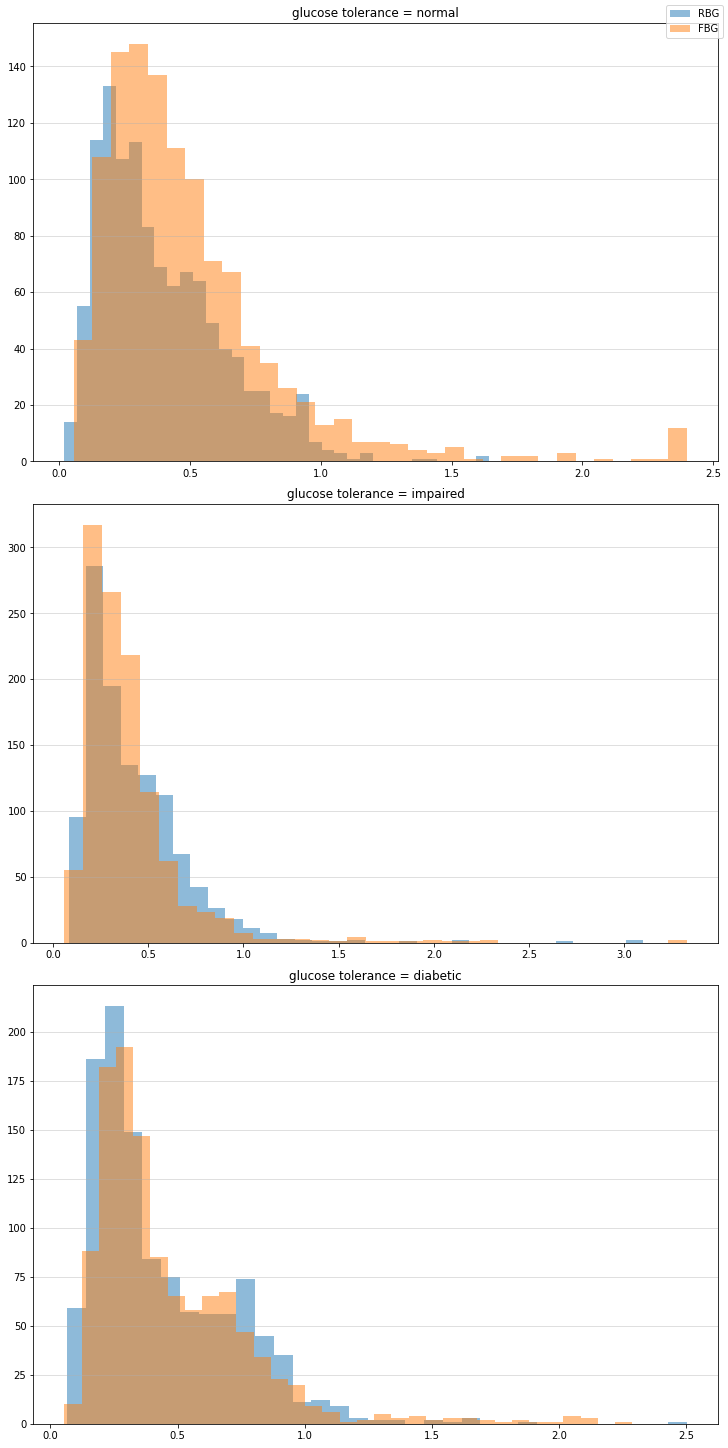

In [155]:
df = rsd_data_by_gluc_tol

fig, axs = plt.subplots(nrows=3, ncols=1, constrained_layout=True)
fig.set_size_inches((10, 20))
# plt.tight_layout()

for i, gluc_tol in enumerate(gluc_tolerances):  # i = row index for axs

        subdf = df.filter(regex=str(gluc_tol))
        
        ax = axs[i]
        
        ax.hist(subdf.iloc[:, 0], alpha=0.5, label='RBG', bins=33)  # 0th column is RBG
        ax.hist(subdf.iloc[:, 1], alpha=0.5, label='FBG', bins=33)  # 1st column is FBG
        
        ax.grid(alpha=0.5, axis='y')

        ax.set_title(f'glucose tolerance = {gluc_tol}')

handles, labels = plt.gca().get_legend_handles_labels()

fig.legend(handles[:2], labels[:2], )
        
# fig.suptitle('Lipid Class and Glucose Tolerance\nRBG vs FBG\nAverage of all 3 weeks', fontsize=20)

In [59]:
cols = file_grouping[(file_grouping['bg_type'] == 'FBG') & (file_grouping['rat_label'] == 1102)]['fr_name']

fr_norm[cols].median(axis=1)

0       1.182398e+07
1       3.004373e+07
2       1.397276e+07
3       1.168454e+08
4       5.958120e+06
            ...     
1481    3.020530e+05
1482    9.924767e+05
1483    6.600295e+05
1484    3.057656e+05
1486    1.938229e+05
Length: 1136, dtype: float64

In [62]:
fr_nonquant_filenames

Index(['20210729_AJ_Toh_RatBloodGlucose_ExtractionBlank.raw (F1)',
       '20210729_AJ_Toh_RatBloodGlucose_SolventBlank.raw (F2)',
       '20210729_AJ_Toh_RatBloodGlucose_T1062M_20210329_9wk_FBG_QC1.raw (F11)',
       '20210729_AJ_Toh_RatBloodGlucose_T1062M_20210329_9wk_FBG_QC3.raw (F13)',
       '20210729_AJ_Toh_RatBloodGlucose_Water_R1.raw (F65)',
       '20210729_AJ_Toh_RatBloodGlucose_Water_R2.raw (F66)',
       '20210729_AJ_Toh_RatBloodGlucose_Water_R3.raw (F67)'],
      dtype='object')

In [72]:
file_grouping.drop(file_grouping['fr_name'].isin(fr_nonquant_filenames).index)

,File Name,analytical_run_order,fr_name,rat_label,bg_type,quant_file,week,lipidex_file_number,date,glucose_tolerance


In [70]:
file_grouping

,File Name,analytical_run_order,fr_name,rat_label,bg_type,quant_file,week,lipidex_file_number,date,glucose_tolerance
0,20210729_AJ_Toh_RatBloodGlucose_Water_R1,1,20210729_AJ_Toh_RatBloodGlucose_Water_R1.raw (...,NaN,NaN,False,NaN,65,NaN,NaN
1,20210729_AJ_Toh_RatBloodGlucose_Water_R2,2,20210729_AJ_Toh_RatBloodGlucose_Water_R2.raw (...,NaN,NaN,False,NaN,66,NaN,NaN
2,20210729_AJ_Toh_RatBloodGlucose_Water_R3,3,20210729_AJ_Toh_RatBloodGlucose_Water_R3.raw (...,NaN,NaN,False,NaN,67,NaN,NaN
3,20210729_AJ_Toh_RatBloodGlucose_SolventBlank,4,20210729_AJ_Toh_RatBloodGlucose_SolventBlank.r...,NaN,NaN,False,NaN,2,NaN,NaN
4,20210729_AJ_Toh_RatBloodGlucose_ExtractionBlank,5,20210729_AJ_Toh_RatBloodGlucose_ExtractionBlan...,NaN,NaN,False,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
62,20210729_AJ_Toh_RatBloodGlucose_T1062M_2021040...,63,20210729_AJ_Toh_RatBloodGlucose_T1062M_2021040...,1062.0,RBG,True,9.0,14,2021-04-01,impaired
63,20210729_AJ_Toh_RatBloodGlucose_T1101M_2021033...,64,20210729_AJ_Toh_RatBloodGlucose_T1101M_2021033...,1101.0,RBG,True,8.0,54,2021-03-30,diabetic
64,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021033...,65,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021033...,1092.0,RBG,True,8.0,42,2021-03-30,impaired
65,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021041...,66,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021041...,1092.0,RBG,True,10.0,46,2021-04-13,impaired


,File Name,analytical_run_order,fr_name,rat_label,bg_type,quant_file,week,lipidex_file_number,date,glucose_tolerance
6,20210729_AJ_Toh_RatBloodGlucose_T1076M_2021040...,7,20210729_AJ_Toh_RatBloodGlucose_T1076M_2021040...,1076.0,FBG,True,10.0,27,2021-04-05,diabetic
7,20210729_AJ_Toh_RatBloodGlucose_T1062M_2021032...,8,20210729_AJ_Toh_RatBloodGlucose_T1062M_2021032...,1062.0,FBG,True,8.0,9,2021-03-22,impaired
8,20210729_AJ_Toh_RatBloodGlucose_T1093M_2021040...,9,20210729_AJ_Toh_RatBloodGlucose_T1093M_2021040...,1093.0,FBG,True,9.0,49,2021-04-02,normal
9,20210729_AJ_Toh_RatBloodGlucose_T1060M_2021032...,10,20210729_AJ_Toh_RatBloodGlucose_T1060M_2021032...,1060.0,RBG,True,8.0,4,2021-03-25,impaired
10,20210729_AJ_Toh_RatBloodGlucose_T1091M_2021041...,11,20210729_AJ_Toh_RatBloodGlucose_T1091M_2021041...,1091.0,FBG,True,10.0,39,2021-04-10,normal
11,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021040...,12,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021040...,1092.0,RBG,True,9.0,44,2021-04-06,impaired
12,20210729_AJ_Toh_RatBloodGlucose_T1093M_2021041...,13,20210729_AJ_Toh_RatBloodGlucose_T1093M_2021041...,1093.0,RBG,True,10.0,52,2021-04-13,normal
13,20210729_AJ_Toh_RatBloodGlucose_T1082M_2021040...,14,20210729_AJ_Toh_RatBloodGlucose_T1082M_2021040...,1082.0,FBG,True,10.0,33,2021-04-05,diabetic
14,20210729_AJ_Toh_RatBloodGlucose_T1060M_2021040...,15,20210729_AJ_Toh_RatBloodGlucose_T1060M_2021040...,1060.0,RBG,True,9.0,6,2021-04-01,impaired
15,20210729_AJ_Toh_RatBloodGlucose_T1101M_2021040...,16,20210729_AJ_Toh_RatBloodGlucose_T1101M_2021040...,1101.0,FBG,True,9.0,55,2021-04-02,diabetic
